# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.667261e+01     1.336898e+01
 * time: 0.0015151500701904297
     1     2.900890e+01     4.643695e+00
 * time: 0.006855964660644531
     2     2.523569e+01     4.319133e+00
 * time: 0.012241125106811523
     3     2.141059e+01     2.832386e+00
 * time: 0.017457008361816406
     4     1.972091e+01     2.001777e+00
 * time: 0.022605180740356445
     5     1.961391e+01     2.243377e+00
 * time: 0.026813983917236328
     6     1.952642e+01     2.045312e+00
 * time: 0.031093120574951172
     7     1.894786e+01     1.923017e+00
 * time: 0.03533315658569336
     8     1.841204e+01     1.138261e+00
 * time: 0.03933000564575195
     9     1.808859e+01     9.403358e-01
 * time: 0.04335212707519531
    10     1.788145e+01     8.101754e-01
 * time: 0.047573089599609375
    11     1.775525e+01     6.442967e-01
 * time: 0.05173611640930176
    12     1.768087e+01     6.318995e-01
 * time: 0.056040048599243164
    13     1.766954e+01     9.648658e-0

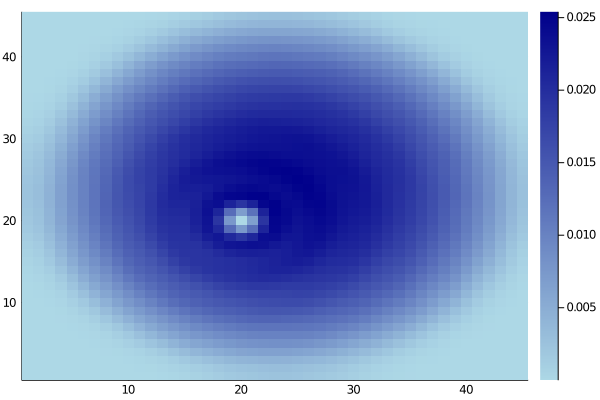

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)